<a href="https://colab.research.google.com/github/al34n1x/DataScience/blob/master/99.Machine_Learning/17_feature_selection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



# Selección de variables



## a. Filtrado de atributos


Con el objetivo de reducir la dimensionalidad, otra técnica es la del filtrado de atributos. Los pasos a seguir son los siguientes.


- Estudiar cada una de las características o atributos que contiene el conjunto de datos.
- Localizar redundancia entre esos atributos.
- Eliminar esas variables redundantes, de forma que sólo quede una variable que exprese una información.


*Ejemplo*. Si dentro del set de datos, se tienen varias características que hacen referencia a las mismas medidas en centímetros y en pulgadas, se deben eliminar todas aquellas variables en pulgadas ya que no aportan ninguna información. Se mantienen las variables en centímetros.



## b. Eliminar variables con baja varianza
 
Eliminar aquellas variables cuya varianza no llega a cierto umbral. Por defecto, eliminar todas las variables con varianza cero (donde todos los valores son iguales). Las variables con baja varianza obligan a hacer el modelo más complejo, y se pierde “tiempo” intentando ajustar variables que no aportan nada

En Scikit-Learn la función `VarianceThreshold` permite eliminar aquellas variables cuya varianza no llega cierto umbral. Por defecto, elimina todas las variables con varianza cero, donde todos los valores son iguales, o cercana a cero.

*Ejemplo*. Imagina que tenemos un dataset con variables categóricas y queremos eliminar aquellas con mas de un 80% de variables iguales. La varianza de variables booleanas es "p(1-p)" donde p es el porcentaje que queramos filtrar, luego `var = (0.8*(1-0.8))`

In [1]:
from sklearn.feature_selection import VarianceThreshold
X = [[0, 0, 3], [0, 2, 0], [1, 0, 0], [0, 2, 3], [0, 2, 0], [0, 2, 3]]

sel = VarianceThreshold(threshold=(.8 * (1 - .8)))
sel.fit_transform(X)

array([[0, 3],
       [2, 0],
       [0, 0],
       [2, 3],
       [2, 0],
       [2, 3]])



Ha eliminado la columna de los unos.



---

## c. Selección de variables en base a estadísticos

Selecciona las mejores variables en base a calculos estadisticos.

* `SelectKBest`: Se queda con las k mejores variables
* `SelectPercentile`: Se queda con un porcentaje de las mejores variables

Ejemplo de los estadisticos que usan son:

* **Chi-cuadrado** entre variables (no puede haber variables negativas). Este estadistico mide dependencia entre variables, por lo que elimina aquellas que menos relación tienen con las demás (las más independientes), ya que son las que menos ayudan en la clasificación


* **f_regression**: se realiza un modelo lineal entre cada variable y la variable objetivo y se mide la correlacion entre ellos (se devuelve como un p-value [Math: F-test comparando si varianzas son iguales]).



In [2]:
from sklearn.datasets import load_iris
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [3]:
iris = load_iris()
features, label = iris.data, iris.target

features_new = SelectKBest(chi2, k=3).fit_transform(features, label)

features_new

array([[5.1, 1.4, 0.2],
       [4.9, 1.4, 0.2],
       [4.7, 1.3, 0.2],
       [4.6, 1.5, 0.2],
       [5. , 1.4, 0.2],
       [5.4, 1.7, 0.4],
       [4.6, 1.4, 0.3],
       [5. , 1.5, 0.2],
       [4.4, 1.4, 0.2],
       [4.9, 1.5, 0.1],
       [5.4, 1.5, 0.2],
       [4.8, 1.6, 0.2],
       [4.8, 1.4, 0.1],
       [4.3, 1.1, 0.1],
       [5.8, 1.2, 0.2],
       [5.7, 1.5, 0.4],
       [5.4, 1.3, 0.4],
       [5.1, 1.4, 0.3],
       [5.7, 1.7, 0.3],
       [5.1, 1.5, 0.3],
       [5.4, 1.7, 0.2],
       [5.1, 1.5, 0.4],
       [4.6, 1. , 0.2],
       [5.1, 1.7, 0.5],
       [4.8, 1.9, 0.2],
       [5. , 1.6, 0.2],
       [5. , 1.6, 0.4],
       [5.2, 1.5, 0.2],
       [5.2, 1.4, 0.2],
       [4.7, 1.6, 0.2],
       [4.8, 1.6, 0.2],
       [5.4, 1.5, 0.4],
       [5.2, 1.5, 0.1],
       [5.5, 1.4, 0.2],
       [4.9, 1.5, 0.2],
       [5. , 1.2, 0.2],
       [5.5, 1.3, 0.2],
       [4.9, 1.4, 0.1],
       [4.4, 1.3, 0.2],
       [5.1, 1.5, 0.2],
       [5. , 1.3, 0.3],
       [4.5, 1.3




## d. Usar árboles para discriminar la importancia de las variables

Los arboles de decisión, por su forma interna de generar las ramas, realizan una ponderación de las variables en base a su importancia. Esto se puede aprovechar para exrtaer esa información y filtrar las variables menos importantes.

In [4]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.datasets import load_iris
from sklearn.feature_selection import SelectFromModel

In [5]:
iris = load_iris()
features, label = iris.data, iris.target
print (features.shape)

(150, 4)


In [6]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import pandas as pd


features_train, features_test, label_train, label_test=train_test_split(iris.data,iris.target,test_size=0.3)
etc = ExtraTreesClassifier(n_estimators=20,max_depth=5)
model = etc.fit(features_train,label_train)

In [7]:
pd.DataFrame({'variable':iris.feature_names,
              'importance':model.feature_importances_},
             columns=['variable','importance'])

,variable,importance
0,sepal length (cm),0.168581
1,sepal width (cm),0.056578
2,petal length (cm),0.358744
3,petal width (cm),0.416097


In [8]:
prediction=model.predict(features_test)
accuracy_score(prediction,label_test)

0.9555555555555556

In [9]:
help(SelectFromModel)

Help on class SelectFromModel in module sklearn.feature_selection._from_model:

class SelectFromModel(sklearn.base.MetaEstimatorMixin, sklearn.feature_selection._base.SelectorMixin, sklearn.base.BaseEstimator)
 |  Meta-transformer for selecting features based on importance weights.
 |  
 |  .. versionadded:: 0.17
 |  
 |  Parameters
 |  ----------
 |  estimator : object
 |      The base estimator from which the transformer is built.
 |      This can be both a fitted (if ``prefit`` is set to True)
 |      or a non-fitted estimator. The estimator must have either a
 |      ``feature_importances_`` or ``coef_`` attribute after fitting.
 |  
 |  threshold : string, float, optional default None
 |      The threshold value to use for feature selection. Features whose
 |      importance is greater or equal are kept while the others are
 |      discarded. If "median" (resp. "mean"), then the ``threshold`` value is
 |      the median (resp. the mean) of the feature importances. A scaling
 |    



Al establecer el valor umbral en 0.2 nos estaríamos quedando con las variables petal length y petal width

In [10]:
selection = SelectFromModel(etc, prefit = False,threshold=0.2) # filters the variables according to a threshold

In [11]:
selection.fit(features_train,label_train)
features_train_new = selection.transform(features_train)



Hay que hacer también la selección de variables para el conjunto de test

In [12]:
features_test_new = selection.transform(features_test)



Comprobamos que efectivamente selecciona únicamente dos variables

In [13]:
features_train_new.shape

(105, 2)

In [14]:
model = etc.fit(features_train_new,label_train)
prediction=model.predict(features_test_new)
accuracy_score(prediction,label_test)

0.9333333333333333

In [15]:
model.feature_importances_

array([0.5278309, 0.4721691])



## f. Selección hacia atrás



`sklearn` incorpora una implementación de la selección hacia atrás llamada *Recursive Feature Elimination*. Utilizando el algoritmo de aprendizaje que queramos (el estimador), él se encarga de ir eliminando variables.

In [16]:
from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFECV
from sklearn.model_selection import StratifiedKFold




Para ello vamos a usar el conjunto de datos de ejemplo `breast_cancer`

In [17]:
cancer = load_breast_cancer()



El estimador que vamos a usar es un random forest, al que le definiriemos el número de árboles y la profundidad de forma manual

In [18]:
rf = RandomForestClassifier(n_estimators=100,max_depth=10)



RFECV es un método que nos permite hacer la selección hacia atrás usando una validación cruzada y además, que es lo más importante, nos permite definir la métrica y obtener la puntuación para cada subset de variables.

In [19]:
rfecv=RFECV(estimator=rf, step=1, cv=StratifiedKFold(5),
              scoring='roc_auc',verbose=1)

In [20]:
rfecv.fit(cancer.data,cancer.target)

Fitting estimator with 30 features.
Fitting estimator with 29 features.
Fitting estimator with 28 features.
Fitting estimator with 27 features.
Fitting estimator with 26 features.
Fitting estimator with 25 features.
Fitting estimator with 24 features.
Fitting estimator with 23 features.
Fitting estimator with 22 features.
Fitting estimator with 21 features.
Fitting estimator with 20 features.
Fitting estimator with 19 features.
Fitting estimator with 18 features.
Fitting estimator with 17 features.
Fitting estimator with 16 features.
Fitting estimator with 15 features.
Fitting estimator with 14 features.
Fitting estimator with 13 features.
Fitting estimator with 12 features.
Fitting estimator with 11 features.
Fitting estimator with 10 features.
Fitting estimator with 9 features.
Fitting estimator with 8 features.
Fitting estimator with 7 features.
Fitting estimator with 6 features.
Fitting estimator with 5 features.
Fitting estimator with 4 features.
Fitting estimator with 3 features.

RFECV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
      estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                       class_weight=None, criterion='gini',
                                       max_depth=10, max_features='auto',
                                       max_leaf_nodes=None, max_samples=None,
                                       min_impurity_decrease=0.0,
                                       min_impurity_split=None,
                                       min_samples_leaf=1, min_samples_split=2,
                                       min_weight_fraction_leaf=0.0,
                                       n_estimators=100, n_jobs=None,
                                       oob_score=False, random_state=None,
                                       verbose=0, warm_start=False),
      min_features_to_select=1, n_jobs=None, scoring='roc_auc', step=1,
      verbose=1)

In [21]:
rfecv.grid_scores_

array([0.94676179, 0.96678138, 0.97724481, 0.97852977, 0.98249728,
       0.98240388, 0.98501909, 0.9877005 , 0.99040616, 0.98978492,
       0.99073528, 0.99070879, 0.99054376, 0.98816314, 0.99015557,
       0.99080299, 0.99044956, 0.99110089, 0.99188075, 0.98885097,
       0.98819666, 0.98976405, 0.99017722, 0.98984463, 0.98962507,
       0.99116577, 0.98981437, 0.98789844, 0.99142283, 0.99038266])

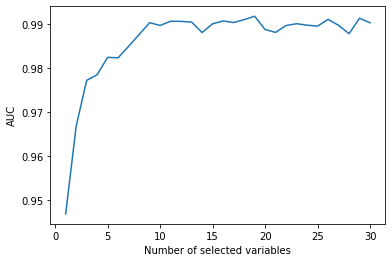

In [22]:
import matplotlib.pyplot as plt

plt.figure()
plt.xlabel("Number of selected variables")
plt.ylabel("AUC")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()



# Ejercicios



## Ejercicio 1

Elige el dataset que quieras y calcula la varianza de cada variable. ¿Quitarías alguna variable basándote en este principio?.

In [23]:
# Respuesta aqui



## Ejercicio 2

Elige el mismo dataset, calcula las varianzas y quedate con las tres mejores variables.

In [24]:
# Respuesta aqui



## Ejercicio 3

Elige el mismo dataset de antes, y quedate con las 3 mejores variables con este método. ¿Coinciden?.


In [25]:
# Respuesta aqui